<a href="https://colab.research.google.com/github/SidtheKidx/tone-classification-CadenceIQ/blob/main/tone_classifier_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tone Classification-CadenceIQ using BERT Transformers


In [18]:
import pandas as pd 
import numpy as np

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SidtheKidx/tone-classification-CadenceIQ/main/datasets/Tones.csv?token=AJVH2HYYDHA7F3BZ44OVHFTAU7XYI')

In [3]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [4]:
df.head(40)

,sentence,tones,tags
0,i didnt feel humiliated,"{ ""document_tone"": { ""tones"": [ { ...",['tentative']
1,i can go from feeling so hopeless to so damned...,"{ ""document_tone"": { ""tones"": [ { ...","['sadness', 'tentative']"
2,im grabbing a minute to post i feel greedy wrong,"{ ""document_tone"": { ""tones"": [ { ...",['sadness']
3,i am ever feeling nostalgic about the fireplac...,"{ ""document_tone"": { ""tones"": [ { ...","['sadness', 'analytical']"
4,i am feeling grouchy,"{ ""document_tone"": { ""tones"": [ { ...","['anger', 'sadness']"
5,ive been feeling a little burdened lately wasn...,"{ ""document_tone"": { ""tones"": [ { ...","['sadness', 'tentative']"
6,ive been taking or milligrams or times recomme...,"{ ""document_tone"": { ""tones"": [ { ...","['joy', 'tentative']"
7,i feel as confused about life as a teenager or...,"{ ""document_tone"": { ""tones"": [ { ...","['sadness', 'tentative']"
8,i have been with petronas for years i feel tha...,"{ ""document_tone"": { ""tones"": [ { ...",['joy']
9,i feel romantic too,"{ ""document_tone"": { ""tones"": [ { ...","['joy', 'tentative']"


In [5]:
list_tones = []
c = 0

for json_data in df['tones']:
    fresh_list = [] 
    data_dict = json.loads(str(json_data))

    for document_tones in data_dict['document_tone']['tones']:
      fresh_list.append(document_tones['tone_id'])
      c+=1

    list_tones.append(fresh_list)

df['Tags'] = pd.Series(list_tones)

print(list_tones)
print(c)

[['tentative'], ['sadness', 'tentative'], ['sadness'], ['sadness', 'analytical'], ['anger', 'sadness'], ['sadness', 'tentative'], ['joy', 'tentative'], ['sadness', 'tentative'], ['joy'], ['joy', 'tentative'], ['sadness', 'analytical'], ['tentative'], ['joy', 'analytical'], ['tentative'], ['sadness', 'tentative'], ['fear'], ['analytical', 'tentative'], ['sadness', 'tentative'], ['joy'], ['tentative'], ['joy'], ['joy'], ['sadness'], ['anger'], ['tentative'], ['sadness', 'fear', 'tentative'], ['tentative'], ['sadness', 'tentative'], ['joy', 'confident'], ['analytical'], ['sadness'], ['anger', 'analytical'], ['sadness', 'analytical'], ['tentative', 'analytical'], ['sadness', 'analytical', 'tentative'], ['sadness', 'tentative', 'analytical'], ['sadness', 'tentative', 'analytical'], ['joy', 'tentative'], ['joy'], ['joy'], ['joy'], ['sadness'], ['tentative'], ['sadness'], ['sadness'], ['joy', 'confident'], ['sadness', 'analytical'], ['tentative'], ['tentative'], ['joy'], ['sadness', 'tentativ

In [8]:
df = df.drop(['tags'], axis=1)

In [21]:
df.head(10)

,sentence,tones,Tags
0,i didnt feel humiliated,"{ ""document_tone"": { ""tones"": [ { ...",[tentative]
1,i can go from feeling so hopeless to so damned...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, tentative]"
2,im grabbing a minute to post i feel greedy wrong,"{ ""document_tone"": { ""tones"": [ { ...",[sadness]
3,i am ever feeling nostalgic about the fireplac...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, analytical]"
4,i am feeling grouchy,"{ ""document_tone"": { ""tones"": [ { ...","[anger, sadness]"
5,ive been feeling a little burdened lately wasn...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, tentative]"
6,ive been taking or milligrams or times recomme...,"{ ""document_tone"": { ""tones"": [ { ...","[joy, tentative]"
7,i feel as confused about life as a teenager or...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, tentative]"
8,i have been with petronas for years i feel tha...,"{ ""document_tone"": { ""tones"": [ { ...",[joy]
9,i feel romantic too,"{ ""document_tone"": { ""tones"": [ { ...","[joy, tentative]"


In [14]:
y = pd.Series(df['Tags'])
x = pd.Series(df['sentence'])

In [15]:
# Encode the tags(labels) in a binary format in order to be used for training
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
 
yt = mlb.fit_transform(y)
yt.shape

(6740, 7)

In [20]:
# Getting a sense of how the tags data looks like
print(yt[5])
print(mlb.inverse_transform(yt[5].reshape(1,-1)))
print(mlb.classes_)

[0 0 0 0 0 1 1]
[('sadness', 'tentative')]
['analytical' 'anger' 'confident' 'fear' 'joy' 'sadness' 'tentative']


In [23]:
types_encoded = pd.DataFrame(mlb.fit_transform(df["Tags"]),columns=mlb.classes_)
types_encoded.head(-10)

,analytical,anger,confident,fear,joy,sadness,tentative
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1
2,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
6725,0,0,1,0,1,0,0
6726,0,0,0,0,1,0,1
6727,1,0,0,0,0,0,0
6728,1,0,0,0,0,0,0


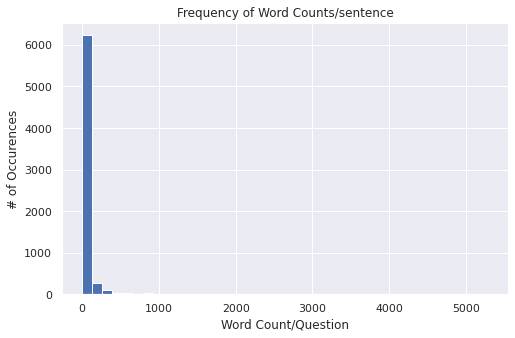

In [19]:
# compute no. of words in each question
questions = x
word_cnt = [len(quest.split()) for quest in questions]
# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_cnt, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence")
plt.show()